<a href="https://colab.research.google.com/github/Katoshy/Data-Analysis-Projects/blob/main/AD_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Підготовка**
Підключення бібліотек та завантаження даних

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Crime.csv")

Оберемо незалажені змінні для прогнозування рівня злочинності.
Як варіант розглянемо дані за 10 років.
Незалежними ознаками оберемо : Безробітну молодь , молодь , низька заробітня плата.

Залежною змінною відповідно буде рівень злочинності за 10 років.

In [ ]:
X = data[['Education10', 'ExpenditureYear10', 'Wage10', 'BelowWage10']]#вибір незалежних ознак
Y = data['CrimeRate10']#вибір залежної ознаки- рівень злочинності

Розіб'ємо наші дані на тренувальні та тестувальні командою train_test_split


Тестових даних буде 23% від усіх доступних даних test_size = 0.23

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

Створення моделі длінійної регресії та тренування її на тренувальному наборі даних.

In [ ]:
lm = LinearRegression().fit(X_train, Y_train)#тренуємо модель на тестових даних 

Запишемо утворені коефіціенти у таблицю.

,Coefficient
Education10,5.340399
ExpenditureYear10,0.855049
Wage10,0.198568
BelowWage10,0.707953


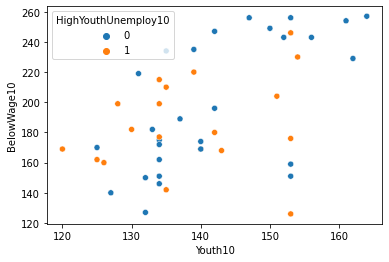

In [ ]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])
sns.scatterplot(data = data, x = "Youth10", y = "BelowWage10",hue="HighYouthUnemploy10")
coef

Спрогнозуэмо на основі натренованої моделі (отриманих коефіціентів) результати для тестового набору.

In [ ]:
Y_pred = lm.predict(X_test)  
df = pd.DataFrame({'Tested':Y_test, 'Predicted':Y_pred})
df

,Tested,Predicted
28,110.5,113.618481
33,127.8,121.216861
30,116.3,116.353398
4,46.7,106.688316
18,94.1,95.178201
11,75.4,83.708736
42,157.3,132.741437
31,119.7,107.847777
22,101.4,86.965969
10,71.4,70.356868


In [ ]:
np.corrcoef(Y_test, Y_pred)[0][1]

0.7055559801873216

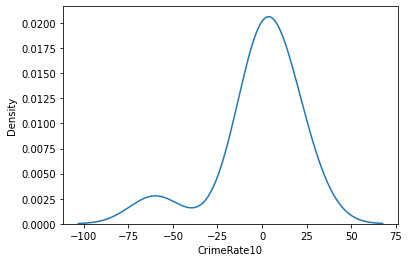

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


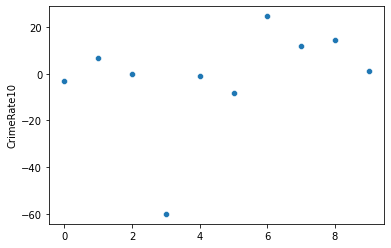

In [ ]:
residuals = Y_test-Y_pred
sns.kdeplot(residuals)
plt.show()
sns.scatterplot(np.arange(residuals.shape[0]), residuals)

З даних діграм бачимо , що залишки:

1) За діаграмою **щільності** значення скупчуються біля нуля , хоча існує невеликий "викид" на проміжку ***(-75;-50)***

2) За діаграмою **розсіювання** підтверджуємо п.1 : залишки зосереджені навколо нуля , є викид при значені приблизно біля ***-60***

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print("R^2 -> ",lm.score(X_test, Y_test))
print("R^2 -> ",r2_score(Y_test, Y_pred))
print("Explained variance ->",explained_variance_score(Y_test, Y_pred))

print("Середньоквадратична похибка:", metrics.mean_squared_error(Y_test, Y_pred))
print("Корінь з середньоквадратичної похибка:", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("Середнє значення злочинності:", data.CrimeRate10.mean())

print("Середня абсолютна похибка:", metrics.mean_absolute_error(Y_test, Y_pred))

R^2 ->  0.4850595685552985
R^2 ->  0.4850595685552985
Explained variance -> 0.48724203167507796
Середньоквадратична похибка: 467.4888766632448
Корінь з середньоквадратичної похибка: 21.62149108325429
Середнє значення злочинності: 102.07021276595745
Середня абсолютна похибка: 13.10182213701189


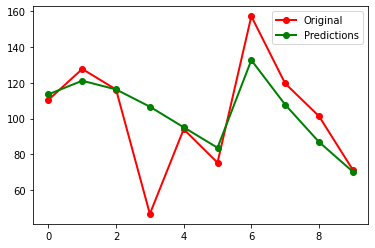

In [ ]:
t = np.arange(len(X_test))
plt.plot(t, Y_test, 'o-r', linewidth=2, label='Original')
plt.plot(t, Y_pred, 'o-g', linewidth=2, label='Predictions')
plt.legend()
plt.show()


**Кластеризація**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

kmeans_data = data[['ExpenditureYear10', 'BelowWage10']]

kmeans_pipeline = Pipeline([('scale', StandardScaler()),('kmeans', KMeans(8,
random_state=0))])
kmeans_pipeline.fit(kmeans_data)

Pipeline(steps=[('scale', StandardScaler()),
                ('kmeans', KMeans(random_state=0))])

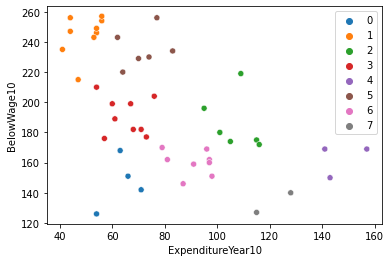

In [ ]:
sns.scatterplot(x=kmeans_data.ExpenditureYear10,y=kmeans_data.BelowWage10,hue=kmeans_pipeline.predict(kmeans_data),palette='tab10')

метрика повертає значення в діапазоні [-1, 1], де -1 є найгіршим
(кластери призначені неправильно), а 1 найкращим; значення
поблизу 0 вказують, що кластери перекриваються. Чим вище це
число, тим краще визначені (більш відокремлені) кластери.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(kmeans_data, kmeans_pipeline.predict(kmeans_data))

0.3674182936319451

Проведемо оцінку відношення відстаней всередині кластера
(відстаней між точками в кластері) до відстаней між кластерами
(відстаней між точками в різних кластерах), яке називається
оцінкою Девіса-Болдіна.

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(kmeans_data, kmeans_pipeline.predict(kmeans_data))

0.7888932280333163

Ще одним показником є оцінка Калінського та Харабаса, або
критерій співвідношення дисперсії, який є відношенням дисперсії
5
всередині кластера до дисперсії між кластерами. Вищі значення
вказують на краще визначені (більш відокремлені) кластери

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(kmeans_data, kmeans_pipeline.predict(kmeans_data))

59.5614816717025